<a href="https://colab.research.google.com/github/JitheshPavan/Data-Science-Intern---Coding-task/blob/main/Training_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1cJmmWGIcGHyROA_HimTrlmUqw5G8tEcq

!unzip -q Assigment_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1cJmmWGIcGHyROA_HimTrlmUqw5G8tEcq
To: /content/Assigment_dataset.zip
100% 14.4M/14.4M [00:00<00:00, 18.0MB/s]


In [2]:
!nvidia-smi

Sat Apr  5 08:10:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# PreProcessing

## Convert labels

In [ ]:
# def convert_bbox_to_yolo(values):
#     class_id = int(values[0])
#     x_min = float(values[1])
#     y_min = float(values[2])
#     x_max = float(values[3])
#     y_max = float(values[4])

#     x_center = round((x_min + x_max) / 2.0, 7)
#     y_center = round((y_min + y_max) / 2.0, 7)
#     width = round(x_max - x_min, 7)
#     height = round(y_max - y_min, 7)

#     return [class_id, x_center, y_center, width, height]
# def process_label_file(file_path):
#     full_path=labels_dir+'/'+file_path
#     with open(full_path, 'r') as f: # change this to read and write
#         bboxes = []
#         for line in f:
#             values = line.strip().split()
#             bboxes.append(convert_bbox_to_yolo(values))
#     file_path = file_path.replace(".jpg", ".txt")

#     # Write bboxes to the file
#     with open(output_dir+'/'+file_path, "w") as f:
#         for bbox in bboxes:
#             f.write(" ".join(map(str, bbox)) + "\n")
# import os

# labels_dir='Assigment_dataset/labels'
# output_dir='/content/labels'
# # Ensure the directory exists
# os.makedirs(output_dir, exist_ok=True)
# number=0
# for file_path in os.listdir(labels_dir):
#     process_label_file(file_path)
#     number+=1
#     # print(f"Converted: {os.path.basename(file_path)}")
# print(number)
# print(f"Conversion complete. Converted {len(os.listdir(labels_dir))} files.")

In [ ]:
# !zip -r labels.zip labels

# Data Preprocessing

Divide the dataset into train and test

In [3]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

!python train_val_split.py --datapath="/content/Assigment_dataset" --train_pct=0.9

--2025-04-05 08:10:26--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-04-05 08:10:26 (45.5 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 300
Number of annotation files: 300
Images moving to train: 270
Images moving to validation: 30


In [4]:
!pip -q install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.5 MB/s eta 0:00:00


# Training

In [5]:
import yaml
data = {
    'path': '/content/data',
    'train': 'train/images',
    'val': 'validation/images',
    'nc': 1,
    'names': ['cavity']
}

with open('/content/data.yaml', 'w') as f:
  yaml.dump(data, f, sort_keys=False)


In [6]:
!yolo detect train data=/content/data.yaml model=yolov8s.pt epochs=175 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 21.5M/21.5M [00:00<00:00, 166MB/s]
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=175, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=F

# Testing

In [15]:
!yolo detect predict model=runs/detect/train/weights/last.pt source=data/validation/images save=True conf=0.4

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/30 /content/data/validation/images/image_5613.jpg: 640x640 1 cavity, 16.3ms
image 2/30 /content/data/validation/images/image_5630.jpg: 640x640 (no detections), 16.3ms
image 3/30 /content/data/validation/images/image_5667.jpg: 640x640 1 cavity, 16.3ms
image 4/30 /content/data/validation/images/image_5697.jpg: 640x640 1 cavity, 16.3ms
image 5/30 /content/data/validation/images/image_5713.jpg: 640x640 (no detections), 16.2ms
image 6/30 /content/data/validation/images/image_5778.jpg: 640x640 1 cavity, 16.2ms
image 7/30 /content/data/validation/images/image_5816.jpg: 640x640 (no detections), 16.2ms
image 8/30 /content/data/validation/images/image_5893.jpg: 640x640 1 cavity, 16.3ms
image 9/30 /content/data/validation/images/image_5903.jpg: 640x640 1 cavity, 11.9ms
image 10/30 /content/data/validation/images/image_5926.jp

In [47]:
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val(conf=0.1)

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/data/validation/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]


                   all         30         31       0.68      0.343      0.502      0.288
Speed: 0.3ms preprocess, 13.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val35


In [35]:
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/last.pt")  # load a custom model

# Validate the model
metrics = model.val(conf=0.5)

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/data/validation/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]


                   all         30         31      0.612      0.226      0.423      0.248
Speed: 2.8ms preprocess, 11.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val23


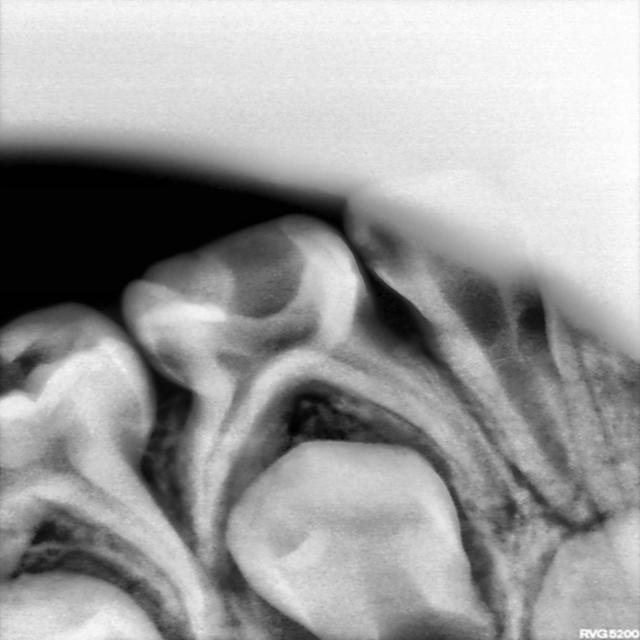

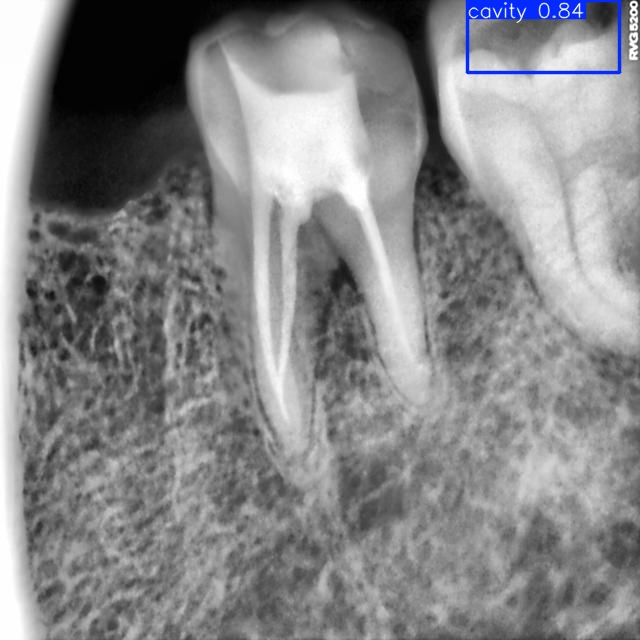

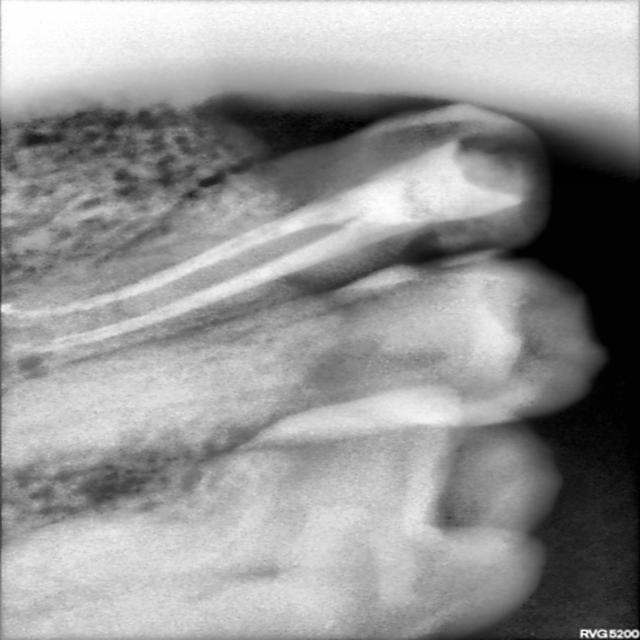

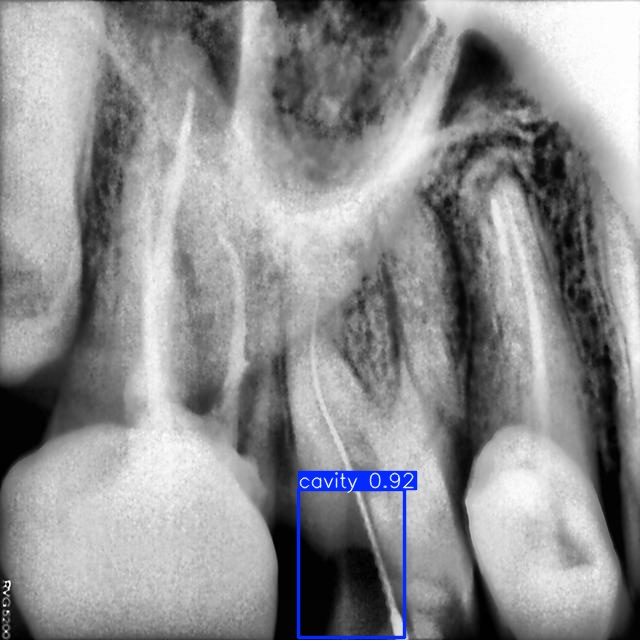

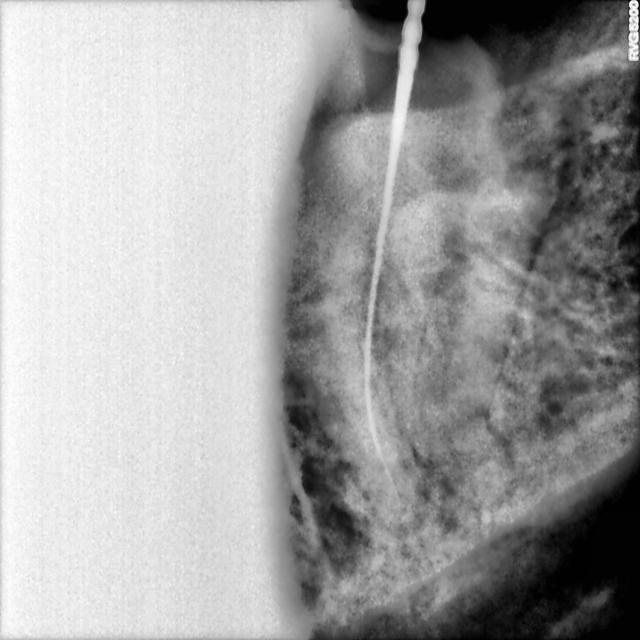

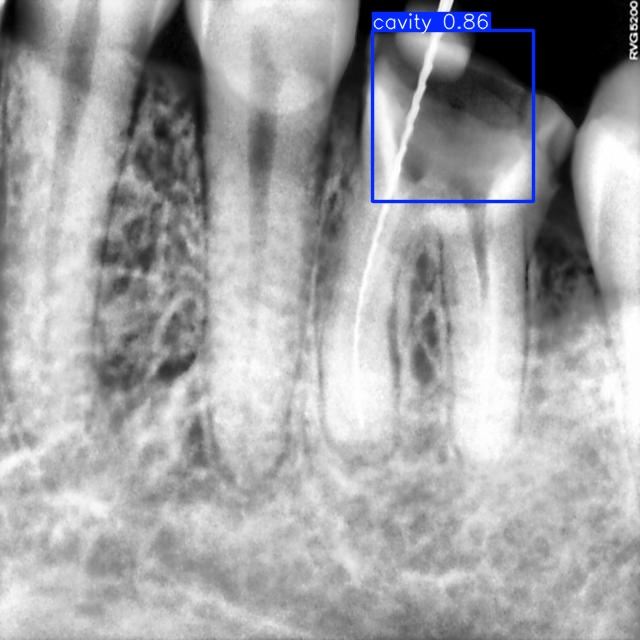

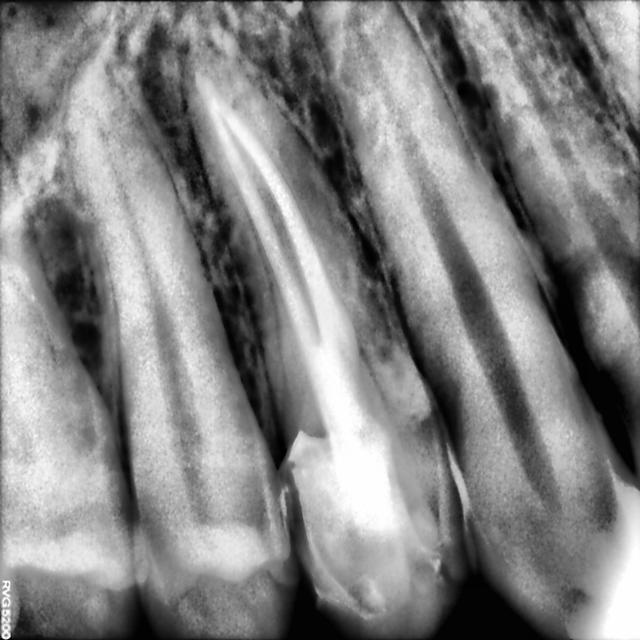

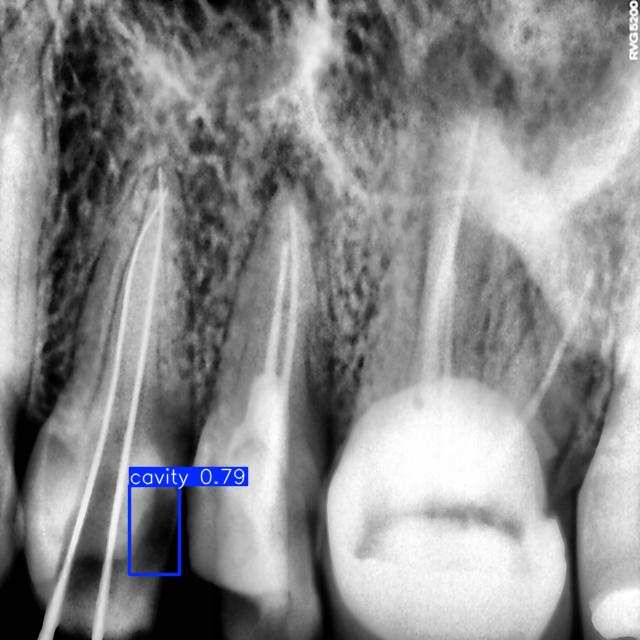

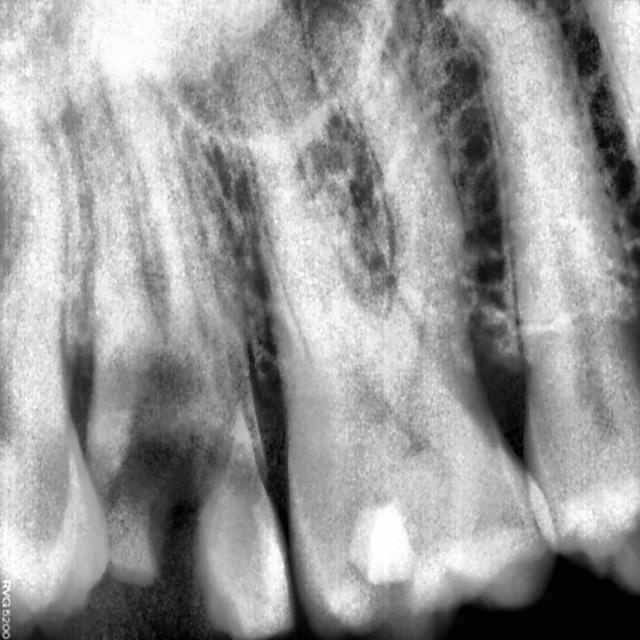

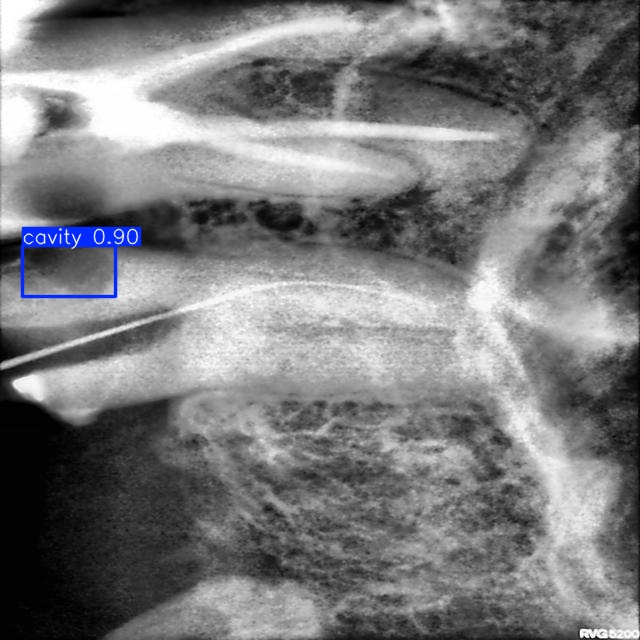

In [8]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

# Save

In [14]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/events.out.tfevents.1743840758.9030d8cf4bf0.1071.0 (deflated 85%)
  adding: train/train_batch0.jpg (deflated 2%)
  adding: train/confusion_matrix_normalized.png (deflated 37%)
  adding: train/P_curve.png (deflated 16%)
  adding: train/train_batch2807.jpg (deflated 11%)
  adding: train/train_batch2.jpg (deflated 3%)
  adding: train/val_batch0_pred.jpg (deflated 10%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/results.csv (deflated 62%)
  adding: train/F1_curve.png (deflated 18%)
  adding: train/labels.jpg (deflated 34%)
  adding: train/val_batch0_labels.jpg (deflated 10%)
  adding: train/results.png (deflated 6%)
  adding: train/train_batch1.jpg (deflated 2%)
  adding: train/labels_correlogram.jpg (deflated 46%)
  adding: train/train_batch2805.jpg (deflated 10%)
  adding: train/R_curve.png 